In [1]:
# some_file.py
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '../')

import data_load

In [2]:
import os 
os.getcwd()
os.chdir('../')

In [3]:
# Data loading and preprocessing
data_loader = data_load.DataLoader()
print("Loading data...")
volumes, labels, patient_id, eye_side = data_loader.retina_npy()
print("Splitting data...")
train_volumes, test_volumes, train_labels, test_labels, train_patient_id, test_patient_id, train_eye_side, test_eye_side = data_loader.retina_npy_split(volumes, labels, patient_id, eye_side)
print(f"Train data shape: {train_volumes.shape}, Train labels shape: {train_labels.shape}")
print(f"Test data shape: {test_volumes.shape}, Test labels shape: {test_labels.shape}")
num_glaucoma = sum(train_labels)
num_healthy = len(train_labels) - num_glaucoma

Loading data...
Splitting data...
Loading train and test indeces...
Splitting train and test data ...
Train data shape: (882, 64, 128, 64), Train labels shape: (882,)
Test data shape: (228, 64, 128, 64), Test labels shape: (228,)


In [4]:
import keras
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
test_labels = np.expand_dims(test_labels, axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 74s 9s/step
 ________________________ RESULS FOR FOLD 1_________________________________
AUC: 0.9459999799728394 
 F1: 0.8619999885559082 
 ACC: 0.8070175647735596]


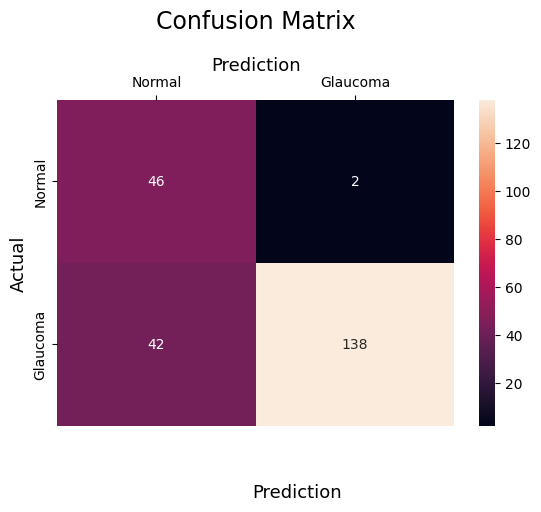



8/8 ━━━━━━━━━━━━━━━━━━━━ 76s 9s/step
 ________________________ RESULS FOR FOLD 2_________________________________
AUC: 0.953000009059906 
 F1: 0.9139999747276306 
 ACC: 0.8684210777282715]


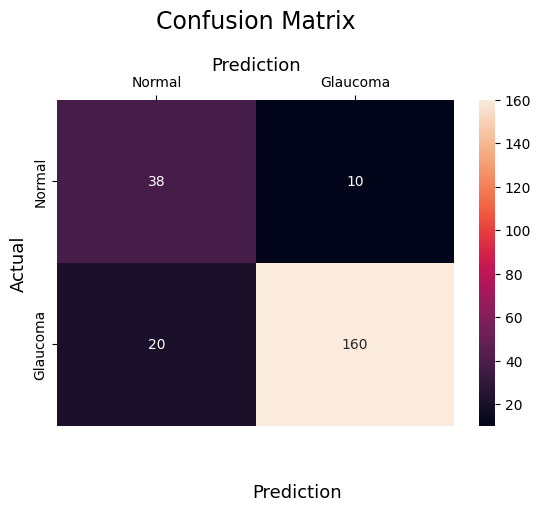



8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 10s/step
 ________________________ RESULS FOR FOLD 3_________________________________
AUC: 0.9599999785423279 
 F1: 0.9390000104904175 
 ACC: 0.8991228342056274]


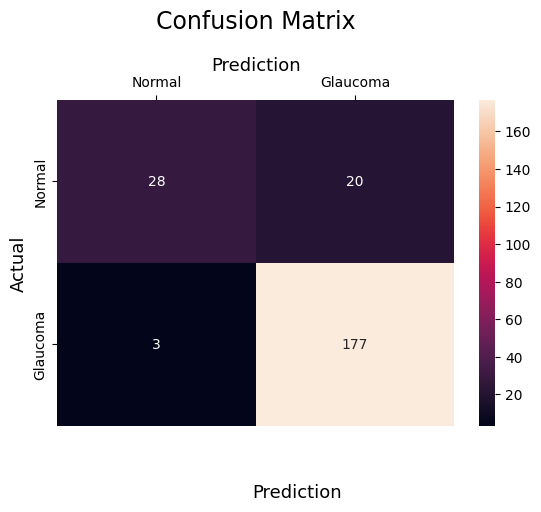



8/8 ━━━━━━━━━━━━━━━━━━━━ 84s 10s/step
 ________________________ RESULS FOR FOLD 4_________________________________
AUC: 0.9490000009536743 
 F1: 0.9440000057220459 
 ACC: 0.9122806787490845]


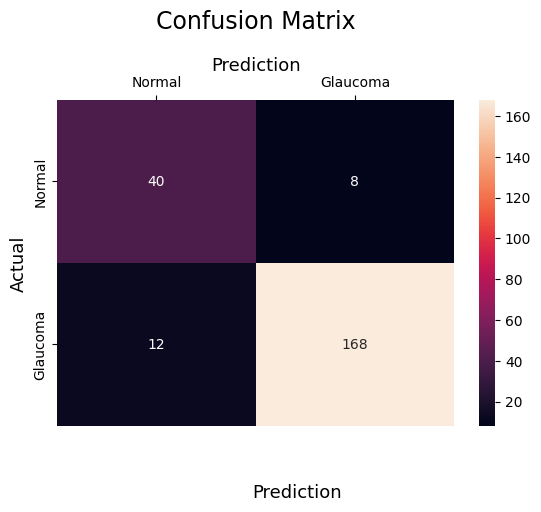



8/8 ━━━━━━━━━━━━━━━━━━━━ 90s 11s/step
 ________________________ RESULS FOR FOLD 5_________________________________
AUC: 0.9419999718666077 
 F1: 0.9259999990463257 
 ACC: 0.8815789222717285]


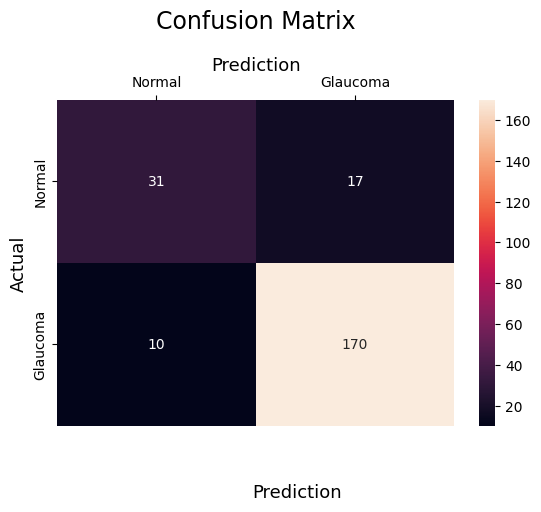

In [6]:
# y_true -> test_labels
# y_pred -> predictions
for i in range(1,6):
    classifier = keras.saving.load_model(f'CNN_weird/model_fold_{i}.keras', compile = False)
    predictions = classifier.predict(test_volumes)
    # only take the second element of the predictions and change shape to (n,1) instead of (n,)
    predictions = np.expand_dims(predictions[:,1] ,axis =1)
    
    # metric computations
    f1_metric = keras.metrics.F1Score(threshold=0.5)
    f1_metric.update_state(test_labels, predictions)
    result_f1 = f1_metric.result()

    auc_metric = keras.metrics.AUC()
    auc_metric.update_state(test_labels, predictions)
    result_auc = auc_metric.result()

    acc_metric = keras.metrics.BinaryAccuracy()
    acc_metric.update_state(test_labels, predictions)
    result_acc = acc_metric.result()

    print(f" ________________________ RESULS FOR FOLD {i}_________________________________")
    print(f"AUC: {np.round(result_auc,3)} \n F1: {np.round(result_f1[0],3)} \n ACC: {result_acc}]")

    # Confusion matrix
    
    predicted_rounded= np.round(predictions, 0)
    cm = confusion_matrix(test_labels,predicted_rounded)

    sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Normal','Glaucoma'],
            yticklabels=['Normal','Glaucoma'])
    plt.ylabel('Actual', fontsize=13)
    plt.title('Confusion Matrix', fontsize=17, pad=20)
    plt.gca().xaxis.set_label_position('top') 
    plt.xlabel('Prediction', fontsize=13)
    plt.gca().xaxis.tick_top()

    plt.gca().figure.subplots_adjust(bottom=0.2)
    plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
    plt.show()
    print("\n")

In [6]:
import matplotlib.pyplot as plt

8/8 ━━━━━━━━━━━━━━━━━━━━ 75s 9s/step
[0.40071186 0.5992881 ]
0.5992881
 ________________________ RESULS FOR FOLD 1_________________________________
AUC: 0.9599999785423279 
 F1: 0.9430000185966492 
 ACC: 0.9078947305679321]


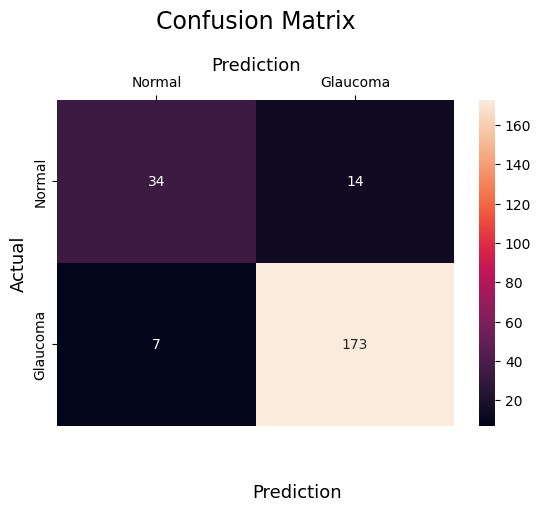



8/8 ━━━━━━━━━━━━━━━━━━━━ 79s 10s/step
[0.38669738 0.61330265]
0.61330265
 ________________________ RESULS FOR FOLD 2_________________________________
AUC: 0.953000009059906 
 F1: 0.9269999861717224 
 ACC: 0.8771929740905762]


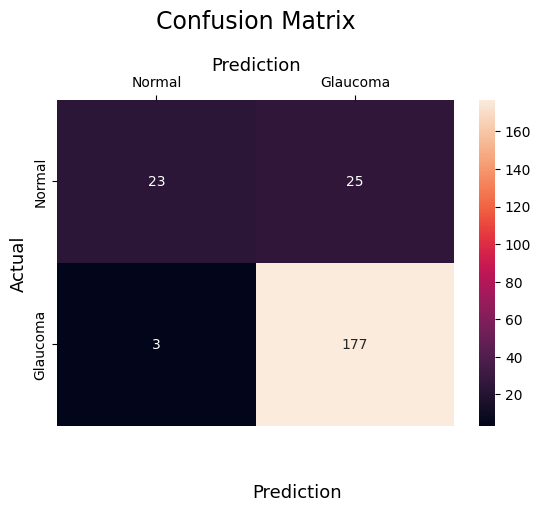



8/8 ━━━━━━━━━━━━━━━━━━━━ 1819s 258s/step
[0.390374   0.60962605]
0.60962605
 ________________________ RESULS FOR FOLD 3_________________________________
AUC: 0.9620000123977661 
 F1: 0.9369999766349792 
 ACC: 0.8947368264198303]


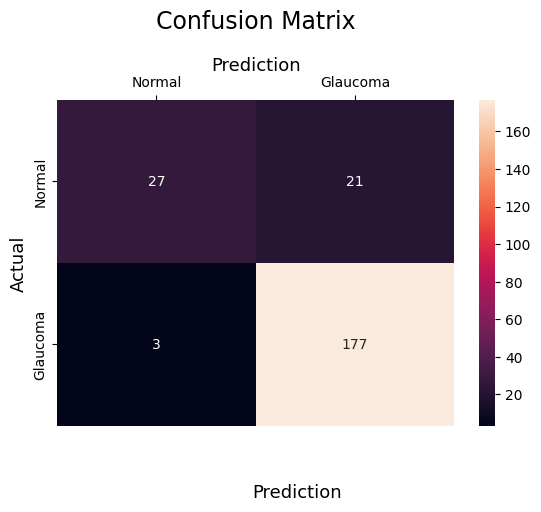



8/8 ━━━━━━━━━━━━━━━━━━━━ 87s 10s/step
[0.39550775 0.6044922 ]
0.6044922
 ________________________ RESULS FOR FOLD 4_________________________________
AUC: 0.9580000042915344 
 F1: 0.9390000104904175 
 ACC: 0.8991228342056274]


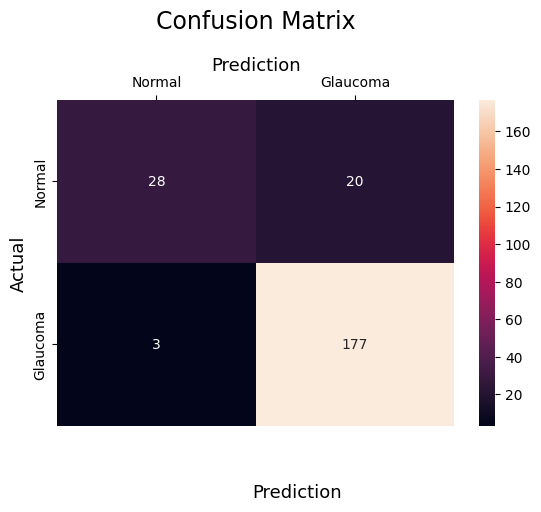



8/8 ━━━━━━━━━━━━━━━━━━━━ 83s 10s/step
[0.41822705 0.5817729 ]
0.5817729
 ________________________ RESULS FOR FOLD 5_________________________________
AUC: 0.9629999995231628 
 F1: 0.9449999928474426 
 ACC: 0.9078947305679321]


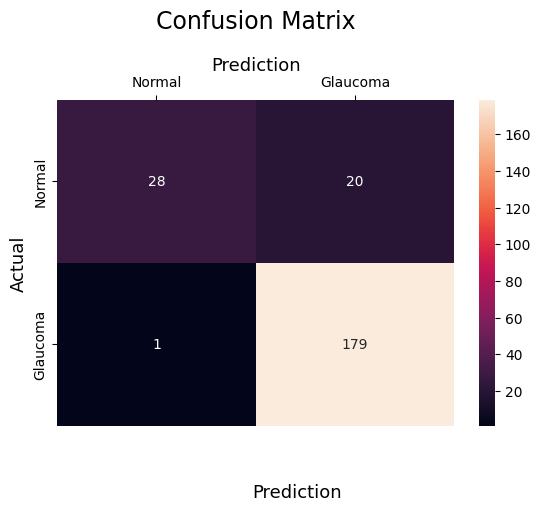

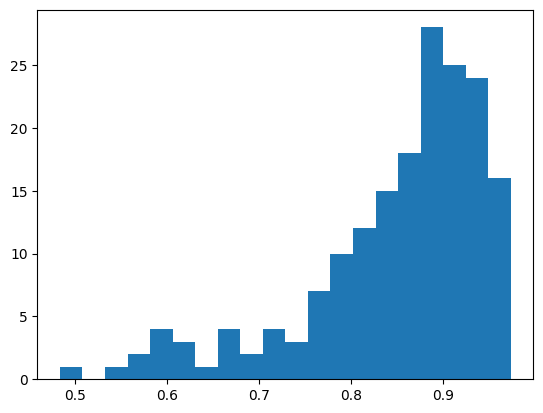

In [ ]:
# y_true -> test_labels
# y_pred -> predictions
for i in range(1,6):
    classifier = keras.saving.load_model(f'CNN_noaug/model_fold_{i}(3).keras', compile = False)
    predictions = classifier.predict(test_volumes)
    print(predictions[0])
    print(predictions[:,1][0])
    # only take the second element of the predictions and change shape to (n,1) instead of (n,)
    predictions = np.expand_dims(predictions[:,1] ,axis =1)
    
    # metric computations
    f1_metric = keras.metrics.F1Score(threshold=0.5)
    f1_metric.update_state(test_labels, predictions)
    result_f1 = f1_metric.result()

        
    auc_metric = keras.metrics.AUC()
    auc_metric.update_state(test_labels, predictions)
    result_auc = auc_metric.result()

    acc_metric = keras.metrics.BinaryAccuracy()
    acc_metric.update_state(test_labels, predictions)
    result_acc = acc_metric.result()

    print(f" ________________________ RESULS FOR FOLD {i}_________________________________")
    print(f"AUC: {np.round(result_auc,3)} \n F1: {np.round(result_f1[0],3)} \n ACC: {result_acc}]")

    # Confusion matrix
    
    predicted_rounded= np.round(predictions, 0)
    cm = confusion_matrix(test_labels,predicted_rounded)

    sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Normal','Glaucoma'],
            yticklabels=['Normal','Glaucoma'])
    plt.ylabel('Actual', fontsize=13)
    plt.title('Confusion Matrix', fontsize=17, pad=20)
    plt.gca().xaxis.set_label_position('top') 
    plt.xlabel('Prediction', fontsize=13)
    plt.gca().xaxis.tick_top()

    plt.gca().figure.subplots_adjust(bottom=0.2)
    plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
    plt.show()
    print("\n")
    

    plt.hist(predictions[test_labels ==1], bins=20)
